In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import DataFrame as df

In [4]:
data = pd.read_csv('yes_bank.csv')
data.shape

(248, 15)

In [5]:
data.head(3)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,YESBANK,EQ,05-Mar-2018,321.05,318.5,319.0,311.15,313.5,312.95,313.63,7973146,2.500595e+09,106273,3068497,38.49
1,YESBANK,EQ,06-Mar-2018,312.95,317.0,320.5,309.85,310.9,312.15,316.43,8299126,2.626120e+09,82913,2915689,35.13
2,YESBANK,EQ,07-Mar-2018,312.15,312.0,314.9,308.00,310.0,311.95,312.50,8420190,2.631345e+09,75842,2743797,32.59


In [6]:
yes_bank = pd.read_csv('yes_bank.csv',index_col=2, parse_dates = True)

In [7]:
yes_bank.head(3)

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2018-03-05,YESBANK,EQ,321.05,318.5,319.0,311.15,313.5,312.95,313.63,7973146,2.500595e+09,106273,3068497,38.49
2018-03-06,YESBANK,EQ,312.95,317.0,320.5,309.85,310.9,312.15,316.43,8299126,2.626120e+09,82913,2915689,35.13
2018-03-07,YESBANK,EQ,312.15,312.0,314.9,308.00,310.0,311.95,312.50,8420190,2.631345e+09,75842,2743797,32.59


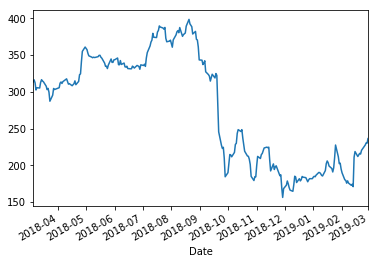

In [8]:
avg = yes_bank['Average Price']
avg.plot()
plt.show()

In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

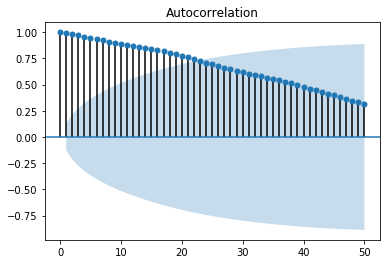

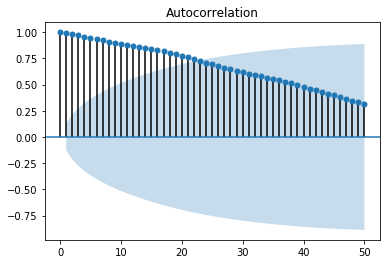

In [10]:
plot_acf(avg, lags=50)

/home/aryann/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


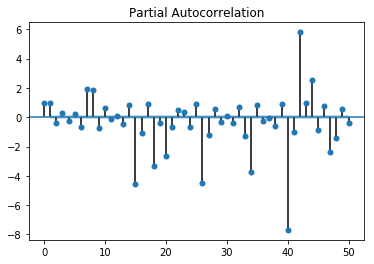

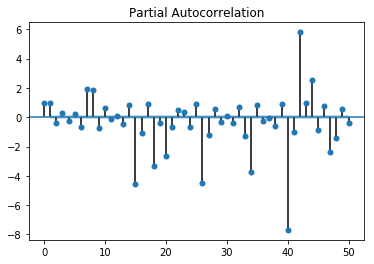

In [52]:
plot_pacf(avg, lags=50)

In [66]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(avg, order=(10,2,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/aryann/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/aryann/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.Average Price   No. Observations:                  246
Model:                ARIMA(10, 2, 2)   Log Likelihood                -867.744
Method:                       css-mle   S.D. of innovations              8.181
Date:                Mon, 04 Mar 2019   AIC                           1763.487
Time:                        06:17:08   BIC                           1812.562
Sample:                             2   HQIC                          1783.247
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0076      0.027      0.285      0.776      -0.045       0.060
ar.L1.D2.Average Price      0.3254      0.932      0.349      0.727      -1.501       2.152


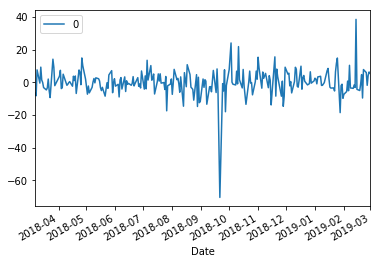

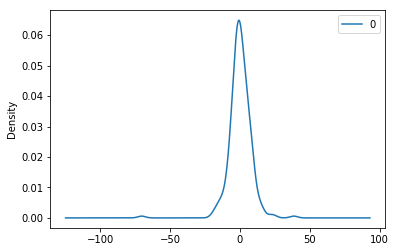

                0
count  246.000000
mean     0.032871
std      8.225540
min    -70.399049
25%     -3.408022
50%     -0.200474
75%      3.923613
max     38.520219


In [67]:
from pandas import DataFrame as df
# plot residual errors
residuals = df(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

predicted=183.756156, expected=184.510000
predicted=181.554524, expected=199.880000
predicted=200.942120, expected=212.290000
predicted=212.433762, expected=209.410000
predicted=209.428858, expected=214.750000
predicted=216.982955, expected=216.240000
predicted=217.751545, expected=223.710000
predicted=228.109626, expected=224.890000
predicted=223.631769, expected=224.110000
predicted=225.183314, expected=224.850000
predicted=225.031164, expected=207.430000
predicted=203.711645, expected=192.510000
predicted=190.190613, expected=202.040000
predicted=203.853645, expected=194.460000
predicted=190.071353, expected=197.980000
predicted=197.873635, expected=199.480000
predicted=195.135402, expected=185.950000
predicted=184.626693, expected=187.140000
predicted=186.994269, expected=169.540000
predicted=163.676097, expected=156.440000
predicted=155.691587, expected=168.470000
predicted=167.183960, expected=173.130000
predicted=172.409647, expected=178.800000
predicted=178.338778, expected=174

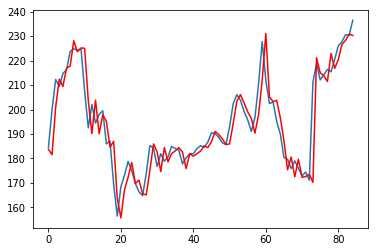

In [68]:
from sklearn.metrics import mean_squared_error
X = avg.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 1740.802245084054
Iteration:      2,   Func. Count:     36,   Neg. LLF: 1738.625086449754
Iteration:      3,   Func. Count:     54,   Neg. LLF: 1738.6028672910188
Iteration:      4,   Func. Count:     73,   Neg. LLF: 1738.5912863069643
Iteration:      5,   Func. Count:     91,   Neg. LLF: 1738.5862195702216
Iteration:      6,   Func. Count:    109,   Neg. LLF: 1738.5861769062121
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1738.5861769048515
            Iterations: 6
            Function evaluations: 109
            Gradient evaluations: 6
<bound method ARCHModelResult.summary of                         Zero Mean - ARCH Model Results                        
Dep. Variable:          Average Price   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.004
Vol Model:                       ARCH   Log-Likelihood:               -1738.

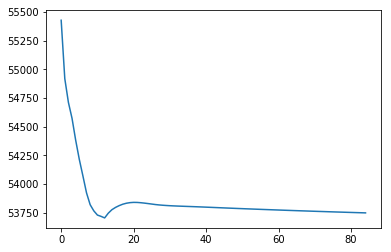

In [88]:
from arch import arch_model
model = arch_model(avg,mean='Zero',vol='ARCH',p=15)
model_fit = model.fit()
print(model_fit.summary)
X = avg.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
yhat = model_fit.forecast(horizon=len(test))
print(yhat.variance.values[-1, :])
plt.plot(yhat.variance.values[-1, :])
plt.show()

Iteration:     10,   Func. Count:     64,   Neg. LLF: 1308.7575029211557
Iteration:     20,   Func. Count:    133,   Neg. LLF: 1299.7197721682223
Iteration:     30,   Func. Count:    199,   Neg. LLF: 1298.5474389365297
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1298.5474391812095
            Iterations: 30
            Function evaluations: 199
            Gradient evaluations: 30
                     Constant Mean - GARCH Model Results                      
Dep. Variable:          Average Price   R-squared:                      -0.642
Mean Model:             Constant Mean   Adj. R-squared:                 -0.642
Vol Model:                      GARCH   Log-Likelihood:               -1298.55
Distribution:                  Normal   AIC:                           2605.09
Method:            Maximum Likelihood   BIC:                           2619.15
                                        No. Observations:                  248
Date:           

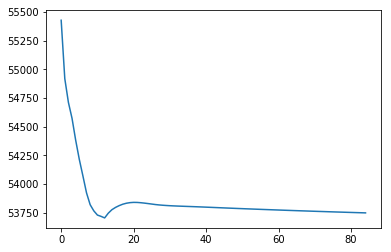

In [90]:
from arch import arch_model
garch11 = arch_model(avg, p=1, q=1)
res = garch11.fit(update_freq=10)
print(res.summary())
X = avg.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
yhat = model_fit.forecast(horizon=len(test))
print(yhat.variance.values[-1, :])
plt.plot(yhat.variance.values[-1, :])
plt.show()

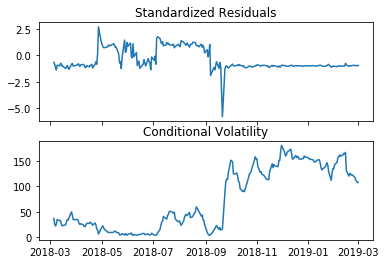

In [79]:
res.plot()
plt.show()